# Importing Data and preprocessing

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r"Data\train.csv")
df2 = pd.read_csv(r"Data\healthcare-dataset-stroke-data.csv")
df2 = df2[df2["stroke"] == 1]
df = pd.concat([df,df2])
df = df.drop(["id"],axis =1)
before = df.shape[0]
df.drop_duplicates(inplace = True)
after = df.shape[0]
print(before-after , " Removed duplicate rows")
df.head()

2  Removed duplicate rows


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [3]:
print("Number of columns before One-hot encoding: ",df.shape[1]-1)
df = pd.get_dummies(df)
print("Number of columns after One-hot encodeing: ",df.shape[1]-1)


Number of columns before One-hot encoding:  10
Number of columns after One-hot encodeing:  21


In [4]:
# Checking NULL values
df = df.dropna()
df.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [5]:
from sklearn.preprocessing import MinMaxScaler

numerical = ['age','avg_glucose_level','bmi']
scaler = MinMaxScaler()
df[numerical] = scaler.fit_transform(df[numerical])
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.340820,0,0,0.112276,0.297994,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0.401855,0,0,0.107242,0.194842,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
2,0.511719,0,0,0.220672,0.429799,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
3,0.682617,0,0,0.044569,0.265043,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0.291992,0,0,0.083780,0.265043,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0


In [6]:
from sklearn.model_selection import train_test_split
all_features = df.drop(["stroke"],axis = 1)
labels = df["stroke"]
all_features.head()

train_features, test_features, train_labels, test_labels = train_test_split(all_features,
                                                                            labels,
                                                                            train_size = 0.8,
                                                                            random_state = 5)



# Trying each model by it's own

## Decision Tree model

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

treeClassifier = RandomForestClassifier( random_state = 42)

hyperparams = {'n_estimators':[120,140,160,100],'min_samples_split':[18,16,22,20]}
roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True,
                             needs_threshold=True)

grid_obj = GridSearchCV(treeClassifier , hyperparams ,scoring = roc_auc_scorer )
grid_fit = grid_obj.fit(train_features, train_labels)

treeClf = grid_fit.best_estimator_
print(grid_fit.best_params_)


{'min_samples_split': 22, 'n_estimators': 160}


In [9]:
treePred = treeClf.predict_proba(test_features)
roc_auc_score(test_labels,treePred[:,1])

0.8829018892310032

## Logistic regression model

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

linearClf = LogisticRegression( max_iter = 300, C=0.9)

linearClf.fit(train_features,train_labels)
linearPred = linearClf.predict_proba(test_features)
roc_auc_score(test_labels,linearPred[:,1])


0.893716501311438

## XGBoost Model

In [11]:
# from xgboost import XGBClassifier
# from sklearn.metrics import roc_auc_score

# xgbClf = XGBClassifier(n_estimators = 500, max_depth = 4,random_state = 5)
# xgbClf.fit(train_features, train_labels)

# xgbPred = xgbClf.predict_proba(test_features)
# roc_auc_score(test_labels,xgbPred[:,1])

In [12]:
# from matplotlib import pyplot as plt
# from sklearn.metrics import roc_curve
# fpr, tpr, _ = roc_curve(test_labels,xgbPred[:,1])
# plt.plot(fpr, tpr, 'b-', label='XGBoost')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.plot([0,1],[0,1],'g--')
# plt.legend()
# plt.show()

## Lasso Regession

In [13]:
from sklearn.linear_model import Lasso

clf = Lasso()
clf.fit(train_features, train_labels)

Lasso()

# Cross-Validation pipeline

In [9]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer
all_models = []
avg_score = 0
cv = KFold(n_splits= 5, random_state = 5, shuffle= True)

roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True,
                             needs_threshold=True)


for i,(train_index,test_index) in enumerate(cv.split(train_features,train_labels)):
    print("Fold number: ",i+1)
    print()
    model1 = LogisticRegressionCV(scoring = roc_auc_scorer, penalty = 'l1', solver = 'saga', max_iter = 1000)
    model1.fit(train_features.iloc[train_index], train_labels.iloc[train_index])
    prediction1 = model1.predict_proba(train_features.iloc[test_index])[:,1]
    
#     model2 = RandomForestClassifier( random_state = 42, min_samples_split= 22, n_estimators=120)
#     model2.fit(train_features.iloc[train_index], train_labels.iloc[train_index])
#     prediction2 = model2.predict_proba(train_features.iloc[test_index])[:,1]
    
    score = roc_auc_score(train_labels.iloc[test_index], prediction1)
#     score += roc_auc_score(train_labels.iloc[test_index], prediction2)
#     score /= 2
    all_models.append(model1)
    print("Score: ", score)
    avg_score+=score
    print()

avg_score /= 5
print("Average_score: ", avg_score)

Fold number:  1



c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

Score:  0.8980376766091052

Fold number:  2



c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

Score:  0.8852186437977911

Fold number:  3



c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

Score:  0.873636837944158

Fold number:  4



c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

Score:  0.8836908342819351

Fold number:  5



c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

Score:  0.886638388797385

Average_score:  0.8854444762860748


c:\Users\burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Testing on my test data with final predictor

In [10]:
import numpy as np
predictions = [model.predict_proba(test_features)[:,1] for model in all_models]
predictions = np.array(predictions)
predictions.shape
predictions = predictions.T.mean(axis=1)
predictions.shape

(3103,)

In [11]:
roc_auc_score(test_labels,predictions)

0.8942106663625652

In [12]:

linearPred = linearClf.predict_proba(test_features)
treePred = treeClf.predict_proba(test_features)
final_prediction = [ (a+b)/2 for a,b in zip(linearPred[:,1],treePred[:,1])]

NameError: name 'treeClf' is not defined

In [14]:
#roc_auc_score(test_labels,final_prediction)
roc_auc_score(test_labels,linearPred[:,1])

0.893716501311438

## Importing Test data

In [19]:
sub = pd.read_csv(r"Data\sample_submission.csv")
test_data = pd.read_csv(r"Data\test.csv")
test_data = test_data.drop(["id"], axis = 1)
test_data = pd.get_dummies(test_data)
test_data[numerical] = scaler.transform(test_data[numerical])
test_data.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.694824,0,0,0.126178,0.330946,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1,0.853516,1,0,0.077776,0.260745,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
2,0.060059,0,0,0.223998,0.131805,1,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
3,0.682617,0,0,0.064752,0.445559,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0.389648,0,0,0.258313,0.283668,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1


## Final prediction and submit

In [20]:
predictions = [model.predict_proba(test_data)[:,1] for model in all_models]
predictions = np.array(predictions)
predictions.shape
predictions = predictions.T.mean(axis=1)
final_prediction = predictions

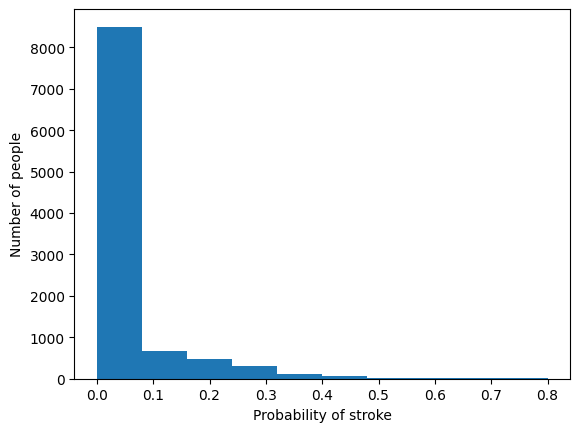

In [21]:
plt.hist(final_prediction)
plt.xlabel("Probability of stroke")
plt.ylabel("Number of people")
plt.show()

In [22]:
final_prediction = linearClf.predict_proba(test_data)[:,1]

In [23]:
sub["stroke"] = final_prediction
sub.to_csv("submission.csv", index = False)